In [24]:
import pandas as pd
import numpy as np
import json


In [25]:
#import nltk.classify.util
#from nltk.classify import NaiveBayesClassifier
#from nltk.corpus import movie_reviews


# A function that extracts which words exist in a text based on a list of words to which we compare.
#def word_feats(words):
#        return dict([(word, True) for word in words])

In [26]:
votes= pd.read_csv('usa-2016-presidential-election-by-county.csv', error_bad_lines=False, sep=";")

In [27]:
votes.head()

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),...,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2
0,Alaska,AK,2100,"Haines Borough, Alaska",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nebraska,NE,31145,"Red Willow County, Nebraska",13.0,5061.0,1216.0,952.0,3735.0,3891.0,...,5044.0,4936.0,93.0,93.0,0.018841,0.018438,0.803428,0.754393,0.196572,0.245607
2,California,CA,6015,"Del Norte County, California",18.0,9361.0,4323.0,3791.0,4967.0,4614.0,...,9531.0,8770.0,241.0,365.0,0.041619,0.025286,0.548959,0.534661,0.451041,0.465339
3,Florida,FL,12031,"Duval County, Florida",199.0,428734.0,202618.0,196737.0,210537.0,211615.0,...,415761.0,411848.0,2606.0,3496.0,0.008489,0.006268,0.518217,0.509584,0.481783,0.490416
4,Kansas,KS,20053,"Ellsworth County, Kansas",25.0,2626.0,851.0,702.0,2021.0,1930.0,...,2938.0,2712.0,66.0,80.0,0.029499,0.022464,0.733283,0.703691,0.266717,0.296309


In [28]:
votes_state= votes.groupby(by=['State'], as_index=False)[["Votes", "Votes16 Trumpd", "Votes16 Clintonh"]].sum()

In [29]:
#votes["State"]

In [30]:
votes_state

,State,Votes,Votes16 Trumpd,Votes16 Clintonh
0,Alabama,2078165.0,1306925.0,718084.0
1,Alaska,0.0,0.0,0.0
2,Arizona,2062810.0,1021154.0,936250.0
3,Arkansas,1121684.0,677904.0,378729.0
4,California,11954317.0,3916209.0,7362490.0
5,Colorado,2564185.0,1137455.0,1212209.0
6,Connecticut,1623542.0,668266.0,884432.0
7,Delaware,441535.0,185103.0,235581.0
8,District of Columbia,280272.0,11553.0,260223.0
9,Florida,9386750.0,4605515.0,4485745.0


In [31]:
votes_state["Trump %"]= (votes_state["Votes16 Trumpd"]/votes_state["Votes"])*100

In [32]:
votes_state["Clinton %"]= (votes_state["Votes16 Clintonh"]/votes_state["Votes"])*100

In [33]:
#votes_state.drop([1])
#votes_state=votes_state.reset_index()


In [34]:
votes_state

,State,Votes,Votes16 Trumpd,Votes16 Clintonh,Trump %,Clinton %
0,Alabama,2078165.0,1306925.0,718084.0,62.888414,34.553753
1,Alaska,0.0,0.0,0.0,NaN,NaN
2,Arizona,2062810.0,1021154.0,936250.0,49.503057,45.387118
3,Arkansas,1121684.0,677904.0,378729.0,60.436273,33.764322
4,California,11954317.0,3916209.0,7362490.0,32.759789,61.588546
5,Colorado,2564185.0,1137455.0,1212209.0,44.359319,47.274631
6,Connecticut,1623542.0,668266.0,884432.0,41.160992,54.475462
7,Delaware,441535.0,185103.0,235581.0,41.922611,53.355000
8,District of Columbia,280272.0,11553.0,260223.0,4.122067,92.846592
9,Florida,9386750.0,4605515.0,4485745.0,49.064000,47.788052


In [35]:
votes_state["T or H"]=
for i in votes_state:
    if votes_state["Trump %"] > votes_state["Clinton %"]:
        votes_state["T or H"] =="T"
    else:
        votes_state["T or H"] =="H"
        

SyntaxError: invalid syntax (<ipython-input-35-8b38e0131305>, line 1)

In [36]:
votes_state['T or H'] = np.where(votes_state["Trump %"] > votes_state["Clinton %"], "Trump", "Hillary")

In [37]:
votes_state1= votes_state.drop([1])

In [38]:
votes_state1=votes_state1.reset_index()

In [83]:
#votes_state.to_csv('US_2016_winners1.csv', index=False)
votes_state=pd.read_csv("US_2016_winners1.csv")

In [82]:
tweets_sentiment= pd.read_csv("tweets_sentiments_polarity_subjectivity.csv")
tweets_sentiment_Trump= pd.read_csv("tweets_Trump_sentiments_polarity_subjectivity.csv")
tweets_sentiment_Hillary= pd.read_csv("tweets_Hillary_sentiments_polarity_subjectivity.csv")


In [84]:
tweets_sentiment_Trump.head()

,Unnamed: 0,text,timestamp,user.name,user.screen_name,user.followers_count,state,topic_words,hashtags_mentions,simple_topic,polarity,subjectivity
0,0,barackobama fbi lorettalynch all in collusion...,2016-08-12 10:04:02.194,Red Octopus,redoctapus,531,LA,['realdonaldtrump'],"['NOJUSTICE', 'TrumpPence', 'BarackObama', 'FB...",T,0.0000,0.000000
1,1,cnn newday clear trump deliberately throwing ...,2016-08-12 10:04:30.035,Beverly Spence,bspence5,2652,MD,['trump'],"['CNN', 'newday', 'Trump', 'ISIS']",T,0.1000,0.383333
2,2,kid you know suing someone thats the most bea...,2016-08-12 10:04:48.229,Rafael Alejandro,GinebraFilms,159,NJ,['realdonaldtrump'],"['funnyordie', 'realDonaldTrump']",T,0.3375,0.425000
3,3,mike4193496 realdonaldtrump i totally concur ...,2016-08-12 10:04:53.571,Kim Wasson,kimseacret3,244,MD,"['realdonaldtrump', 'trump']","['mike4193496', 'realDonaldTrump']",T,0.0000,0.408333
4,5,realdonaldtrump elsolarverde what issues your...,2016-08-12 10:05:00.012,Mechadave,Anumbr1,289,MI,"['realdonaldtrump', 'trump']","['realDonaldTrump', 'elsolarverde']",T,-0.8000,0.800000


In [42]:
tweets_states = tweets_sentiment.groupby(by=['state'], as_index=False)[['polarity']].mean()


In [86]:
tweets_Trump_states =tweets_sentiment_Trump.groupby(by=['state'], as_index=False)[['polarity']].mean()
tweets_Hillary_states =tweets_sentiment_Hillary.groupby(by=['state'], as_index=False)[['polarity']].mean()


In [43]:
statenames_list=["Alaska","Alabama","Arkansas","Arizona","California","Colorado","Connecticut","District of Columbia","Delaware","Florida","Georgia","Hawaii","Iowa","Idaho","Illinois","Indiana","Kansas","Kentucky","Louisiana","Massachusetts","Maryland","Maine","Michigan","Minnesota","Missouri","Mississippi","Montana","North Carolina","North Dakota","Nebraska","New Hampshire","New Jersey","New Mexico","Nevada","New York","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Virginia","Vermont","Washington","Wisconsin","West Virginia","Wyoming"]


In [89]:
statenames_Trump_list=["Alaska","Alabama","Arkansas","Arizona","California","Colorado","Connecticut","District of Columbia","Delaware","Florida","Georgia","Hawaii","Iowa","Idaho","Illinois","Indiana","Kansas","Kentucky","Louisiana","Massachusetts","Maryland","Maine","Michigan","Minnesota","Missouri","Mississippi","Montana","North Carolina","North Dakota","Nebraska","New Hampshire","New Jersey","New Mexico","Nevada","New York","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Virginia","Vermont","Washington","Wisconsin","West Virginia","Wyoming"]
statenames_Hillary_list=["Alaska","Alabama","Arkansas","Arizona","California","Colorado","Connecticut","District of Columbia","Delaware","Florida","Georgia","Hawaii","Iowa","Idaho","Illinois","Indiana","Kansas","Kentucky","Louisiana","Massachusetts","Maryland","Maine","Michigan","Minnesota","Missouri","Mississippi","Montana","North Carolina","North Dakota","Nebraska","New Hampshire","New Jersey","New Mexico","Nevada","New York","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Virginia","Vermont","Washington","Wisconsin","West Virginia","Wyoming"]


In [44]:
tweets_states["state_name"]=statenames_list

In [90]:
tweets_Trump_states["state_name"]=statenames_Trump_list
tweets_Hillary_states["state_name"]=statenames_Hillary_list

In [93]:
tweets_Hillary_states

,state,polarity,state_name
0,AK,0.020546,Alaska
1,AL,0.047401,Alabama
2,AR,0.017287,Arkansas
3,AZ,0.014854,Arizona
4,CA,0.024039,California
5,CO,0.004728,Colorado
6,CT,0.042550,Connecticut
7,DC,0.079249,District of Columbia
8,DE,0.000902,Delaware
9,FL,0.020642,Florida


In [46]:
tweets_states=tweets_states.sort_values(by=['state_name'])
tweets_states=tweets_states.reset_index()
tweets_states

,index,state,polarity,state_name
0,1,AL,0.042941,Alabama
1,0,AK,0.032879,Alaska
2,3,AZ,0.040153,Arizona
3,2,AR,0.040178,Arkansas
4,4,CA,0.028146,California
5,5,CO,0.017718,Colorado
6,6,CT,0.030055,Connecticut
7,8,DE,0.024187,Delaware
8,7,DC,0.057254,District of Columbia
9,9,FL,0.040260,Florida


In [94]:
tweets_Trump_states=tweets_Trump_states.sort_values(by=['state_name'])
tweets_Trump_states=tweets_Trump_states.reset_index()
tweets_Trump_states

,index,state,polarity,state_name
0,1,AL,0.047455,Alabama
1,0,AK,0.048553,Alaska
2,3,AZ,0.051089,Arizona
3,2,AR,0.059726,Arkansas
4,4,CA,0.027788,California
5,5,CO,0.032420,Colorado
6,6,CT,0.027523,Connecticut
7,8,DE,0.040675,Delaware
8,7,DC,0.041711,District of Columbia
9,9,FL,0.050078,Florida


In [95]:
tweets_Hillary_states=tweets_Hillary_states.sort_values(by=['state_name'])
tweets_Hillary_states=tweets_Hillary_states.reset_index()
tweets_Hillary_states

,index,state,polarity,state_name
0,1,AL,0.047401,Alabama
1,0,AK,0.020546,Alaska
2,3,AZ,0.014854,Arizona
3,2,AR,0.017287,Arkansas
4,4,CA,0.024039,California
5,5,CO,0.004728,Colorado
6,6,CT,0.042550,Connecticut
7,8,DE,0.000902,Delaware
8,7,DC,0.079249,District of Columbia
9,9,FL,0.020642,Florida


In [47]:
votes_state["polarity"]=tweets_states["polarity"]
votes_state

,State,Votes,Votes16 Trumpd,Votes16 Clintonh,Trump %,Clinton %,T or H,polarity
0,Alabama,2078165.0,1306925.0,718084.0,62.888414,34.553753,Trump,0.042941
1,Alaska,0.0,0.0,0.0,NaN,NaN,Hillary,0.032879
2,Arizona,2062810.0,1021154.0,936250.0,49.503057,45.387118,Trump,0.040153
3,Arkansas,1121684.0,677904.0,378729.0,60.436273,33.764322,Trump,0.040178
4,California,11954317.0,3916209.0,7362490.0,32.759789,61.588546,Hillary,0.028146
5,Colorado,2564185.0,1137455.0,1212209.0,44.359319,47.274631,Hillary,0.017718
6,Connecticut,1623542.0,668266.0,884432.0,41.160992,54.475462,Hillary,0.030055
7,Delaware,441535.0,185103.0,235581.0,41.922611,53.355000,Hillary,0.024187
8,District of Columbia,280272.0,11553.0,260223.0,4.122067,92.846592,Hillary,0.057254
9,Florida,9386750.0,4605515.0,4485745.0,49.064000,47.788052,Trump,0.040260


In [107]:
#votes_state["polarity"]=tweets_Trump_states["polarity"]
votes_state["polarity"]=tweets_Hillary_states["polarity"]

votes_state

,State,Votes,Votes16 Trumpd,Votes16 Clintonh,Trump %,Clinton %,T or H,polarity,winner
24,Mississippi,1162987.0,678457.0,462001.0,58.337453,39.725380,Trump,0.026306,1
44,Utah,984957.0,452086.0,274188.0,45.899060,27.837560,Trump,-0.013319,1
41,South Dakota,367151.0,227460.0,114938.0,61.952712,31.305376,Trump,0.017472,1
37,Oregon,1808575.0,742506.0,934631.0,41.054753,51.677757,Hillary,0.021364,0
11,Hawaii,428825.0,128815.0,266827.0,30.039060,62.222818,Hillary,0.065331,0
30,New Jersey,3674893.0,1535513.0,2021756.0,41.783883,55.015371,Hillary,0.025265,0
6,Connecticut,1623542.0,668266.0,884432.0,41.160992,54.475462,Hillary,0.042550,0
4,California,11954317.0,3916209.0,7362490.0,32.759789,61.588546,Hillary,0.024039,0
16,Kansas,1147143.0,656009.0,414788.0,57.186332,36.158352,Trump,0.078696,1
47,Washington,2957942.0,1129120.0,1610524.0,38.172486,54.447450,Hillary,0.025749,0


In [108]:
votes_state=votes_state.sort_values(by=['polarity'])
#votes_state=votes_state.drop(columns=['index'])
votes_state

,State,Votes,Votes16 Trumpd,Votes16 Clintonh,Trump %,Clinton %,T or H,polarity,winner
12,Idaho,688235.0,407199.0,189677.0,59.165692,27.559918,Trump,-0.023699,1
34,North Dakota,336968.0,216133.0,93526.0,64.140512,27.755158,Trump,-0.015851,1
50,Wyoming,248742.0,174248.0,55949.0,70.051700,22.492784,Trump,-0.014882,1
44,Utah,984957.0,452086.0,274188.0,45.899060,27.837560,Trump,-0.013319,1
7,Delaware,441535.0,185103.0,235581.0,41.922611,53.355000,Hillary,0.000902,0
5,Colorado,2564185.0,1137455.0,1212209.0,44.359319,47.274631,Hillary,0.004728,0
39,Rhode Island,450787.0,179421.0,249902.0,39.801725,55.436825,Hillary,0.009942,0
38,Pennsylvania,5970107.0,2912941.0,2844705.0,48.792107,47.649146,Trump,0.011680,1
2,Arizona,2062810.0,1021154.0,936250.0,49.503057,45.387118,Trump,0.014854,1
13,Illinois,5374280.0,2118179.0,2977498.0,39.413261,55.402733,Hillary,0.017216,0


In [109]:
chopped = votes_state[["State","polarity"]]
#alaska={"State": "Alaska", "polarity": 0.000000}
#chopped = chopped.append(alaska, ignore_index=True)
chopped

,State,polarity
12,Idaho,-0.023699
34,North Dakota,-0.015851
50,Wyoming,-0.014882
44,Utah,-0.013319
7,Delaware,0.000902
5,Colorado,0.004728
39,Rhode Island,0.009942
38,Pennsylvania,0.011680
2,Arizona,0.014854
13,Illinois,0.017216


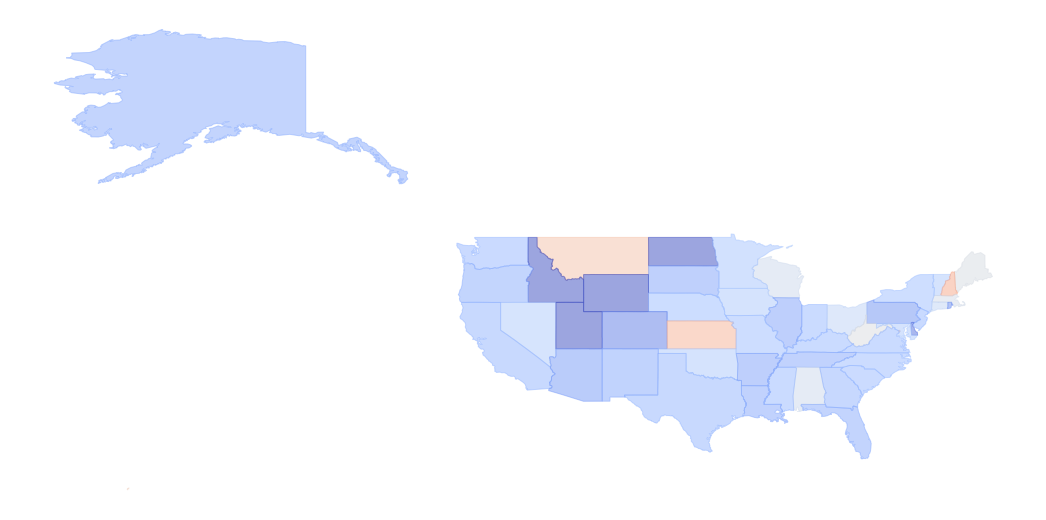

In [110]:
#State population by colour
import os
import json
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon




S_DIR = r"C:\Users\i518410\OneDrive - SAP SE\Documents\UvA DATA SCIENCE\Fundamentals of Data Science\Scripts and Datasets\States"

BLUE = '#5599ff'

with open(os.path.join(S_DIR, 'states.json')) as rf:    
    data = json.load(rf)
#data=r"C:\Users\i518410\OneDrive - SAP SE\Documents\UvA DATA SCIENCE\Fundamentals of Data Science\Scripts and Datasets\states.json"

fig = plt.figure() 
ax = fig.gca()
fig.set_size_inches(18.5, 10.5)
for feature in data['features']:
    geometry = feature['geometry']
    NAME = feature['properties']['STATE_NAME']
    POP=chopped.loc[chopped['State'] == NAME, 'polarity'].iloc[0]
    cmap = plt.cm.coolwarm
    norm = matplotlib.colors.Normalize(vmin=-0.01, vmax=0.12)
    col = cmap(norm(POP))
    #print(NAME,POP,col)
    if geometry['type'] == 'Polygon':
        poly = geometry
        ppatch = PolygonPatch(poly, fc=col, ec=col,  alpha=0.5, zorder=2)
        ax.add_patch(ppatch)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ppatch = PolygonPatch(poly, fc=col, ec=col, alpha=0.5, zorder=2)
            ax.add_patch(ppatch)
    else:
        print('Don\'t know how to draw :', geometry['type'])

ax.axis('scaled')
plt.axis('off')
plt.show()

In [103]:
#votes_state=votes_state.drop(columns=["winner"])
votes_state['winner'] = np.where(votes_state['T or H']== 'Trump', 1 , 0)
votes_state


,State,Votes,Votes16 Trumpd,Votes16 Clintonh,Trump %,Clinton %,T or H,polarity,winner
24,Mississippi,1162987.0,678457.0,462001.0,58.337453,39.725380,Trump,-0.002903,1
44,Utah,984957.0,452086.0,274188.0,45.899060,27.837560,Trump,0.010924,1
41,South Dakota,367151.0,227460.0,114938.0,61.952712,31.305376,Trump,0.014920,1
37,Oregon,1808575.0,742506.0,934631.0,41.054753,51.677757,Hillary,0.017677,0
11,Hawaii,428825.0,128815.0,266827.0,30.039060,62.222818,Hillary,0.025046,0
30,New Jersey,3674893.0,1535513.0,2021756.0,41.783883,55.015371,Hillary,0.025517,0
6,Connecticut,1623542.0,668266.0,884432.0,41.160992,54.475462,Hillary,0.027523,0
4,California,11954317.0,3916209.0,7362490.0,32.759789,61.588546,Hillary,0.027788,0
16,Kansas,1147143.0,656009.0,414788.0,57.186332,36.158352,Trump,0.028324,1
47,Washington,2957942.0,1129120.0,1610524.0,38.172486,54.447450,Hillary,0.028939,0


In [104]:
 votes_state.loc[votes_state['State'] == "Alaska"]

,State,Votes,Votes16 Trumpd,Votes16 Clintonh,Trump %,Clinton %,T or H,polarity,winner
1,Alaska,0.0,0.0,0.0,NaN,NaN,Trump,0.048553,1


In [39]:
#votes_state['T or H'] = np.where((votes_state["State"] == 'Alaska'),'Trump')

ValueError: either both or neither of x and y should be given

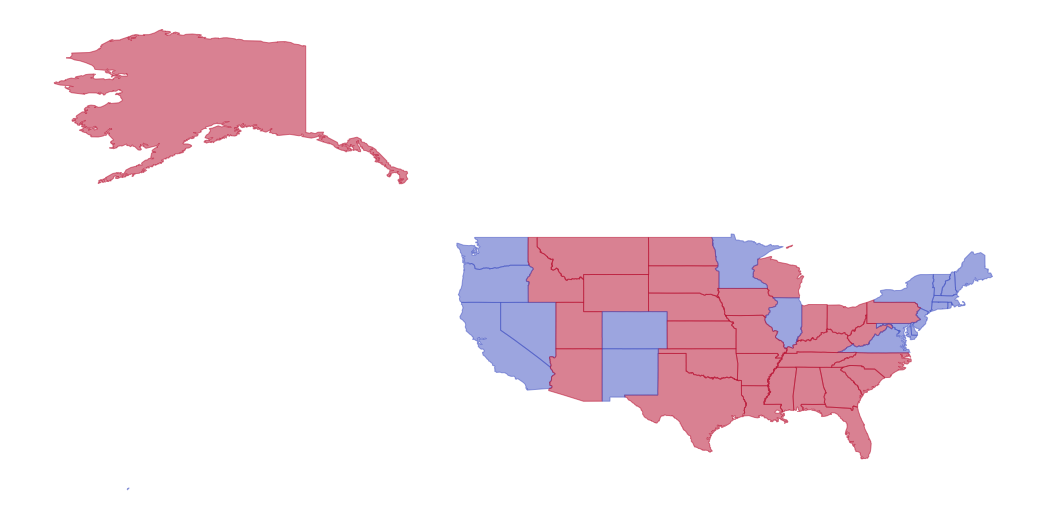

In [105]:
fig = plt.figure() 
ax = fig.gca()
fig.set_size_inches(18.5, 10.5)
for feature in data['features']:
    geometry = feature['geometry']
    NAME = feature['properties']['STATE_NAME']
    POP=votes_state.loc[votes_state['State'] == NAME, 'winner'].iloc[0]
    cmap = plt.cm.coolwarm
    norm = matplotlib.colors.Normalize(vmin=0.0, vmax=1)
    col = cmap(norm(POP))
    #print(NAME,POP,col)
    if geometry['type'] == 'Polygon':
        poly = geometry
        ppatch = PolygonPatch(poly, fc=col, ec=col,  alpha=0.5, zorder=2)
        ax.add_patch(ppatch)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates'][0]:
            poly = Polygon(polygon)
            ppatch = PolygonPatch(poly, fc=col, ec=col, alpha=0.5, zorder=2)
            ax.add_patch(ppatch)
    else:
        print('Don\'t know how to draw :', geometry['type'])

ax.axis('scaled')
plt.axis('off')
plt.show()

In [53]:
votes_state['polarity'].corr(votes_state['winner'])

0.14719667526094177

In [54]:
#POP = chopped.loc[chopped['State'] == NAME, 'polarity'].iloc[0]


In [55]:
#alaska={"State": "Alaska", "polarity": 0.000000}
#chopped = chopped.append(alaska, ignore_index=True)
#chopped

In [111]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=tweets_states['state'], # Spatial coordinates
    z = tweets_states['polarity'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Polarity",
))

fig.update_layout(
    title_text = ' based on tweets_sentiments_polarity_subjectivity.csv',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

ModuleNotFoundError: No module named 'plotly'